In [159]:
import numpy as np
import pandas as pd 

In [160]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn import preprocessing

In [214]:
data=pd.read_csv("data.csv")

In [215]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [163]:
(data.shape)

(8128, 13)

In [216]:
data=data.dropna(how='any',axis=0)

In [217]:
name_c=list(data.pivot_table(columns=['name']).columns)

In [218]:
len(name_c)

1982

In [219]:
dict={}
for x in range(len(name_c)):
    dict[name_c[x]]=x

In [220]:
data["name"]=data["name"].replace(dict)

In [221]:
data["fuel"]=data["fuel"].replace({"CNG":0,"Diesel":1,"LPG":2,"Petrol":3})

In [222]:
data["seller_type"]=data["seller_type"].replace({"Dealer":0,"Individual":1,"Trustmark Dealer":2})

In [223]:
data.pivot_table(columns=['seller_type'])

seller_type,0,1,2
fuel,1.750678e+00,1.881914,2.711864
km_driven,4.403528e+04,74399.708365,42259.317797
name,9.095113e+02,1021.545787,1238.355932
seats,5.240289e+00,5.451623,5.262712
selling_price,1.459910e+06,507705.823556,801838.983051
year,2.016038e+03,2013.557977,2016.194915


In [224]:
data["owner"]=data["owner"].replace({"First Owner":0,"Fourth & Above Owner":1,"Second Owner":2,"Test Drive Car":3,"Third Owner":4})

In [225]:
data=data.drop(columns=['torque'])

In [226]:
data.pivot_table(columns=['transmission'])

transmission,Automatic,Manual
fuel,1.977906e+00,1.874727
km_driven,3.984908e+04,73637.677058
name,9.739827e+02,1018.145666
owner,3.304515e-01,0.859869
seats,5.237272e+00,5.443554
seller_type,6.551393e-01,0.925419
selling_price,1.882972e+06,462819.124982
year,2.016454e+03,2013.609323


In [227]:
data["transmission"]=data["transmission"].replace({"Automatic":0,"Manual":1})

In [228]:
data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [229]:
correct_mileage=[]
for i in data.mileage:
    if str(i).endswith("km/kg"):
        i=i[:-6]
        i=float(i)*1.40
        correct_mileage.append(float(i))
    elif str(i).endswith("kmpl"):
        i=i[:-6]
        correct_mileage.append(float(i))

In [230]:
data["mileage"]=correct_mileage

In [231]:
correct_engine=[]
for i in data.engine:
        i=i[:-3]
        correct_engine.append(float(i))

In [232]:
data["engine"]=correct_mileage

In [233]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,1249,2014,450000,145500,1,1,1,0,23.0,23.0,74 bhp,5.0
1,1546,2014,370000,120000,1,1,1,2,21.1,21.1,103.52 bhp,5.0
2,375,2006,158000,140000,3,1,1,4,17.0,17.0,78 bhp,5.0
3,743,2010,225000,127000,1,1,1,0,23.0,23.0,90 bhp,5.0
4,1290,2007,130000,120000,3,1,1,0,16.0,16.0,88.2 bhp,5.0


In [234]:
correct_max_power=[]
for i in data.max_power:
        i=i[:-4]
        correct_max_power.append(float(i))

In [235]:
data["max_power"]=correct_max_power

In [236]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,1249,2014,450000,145500,1,1,1,0,23.0,23.0,74.00,5.0
1,1546,2014,370000,120000,1,1,1,2,21.1,21.1,103.52,5.0
2,375,2006,158000,140000,3,1,1,4,17.0,17.0,78.00,5.0
3,743,2010,225000,127000,1,1,1,0,23.0,23.0,90.00,5.0
4,1290,2007,130000,120000,3,1,1,0,16.0,16.0,88.20,5.0


In [185]:
model=LinearRegression()
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,1249,2014,450000,145500,1,1,1,0,23.0,23.0,74.00,5.0
1,1546,2014,370000,120000,1,1,1,2,21.1,21.1,103.52,5.0
2,375,2006,158000,140000,3,1,1,4,17.0,17.0,78.00,5.0
3,743,2010,225000,127000,1,1,1,0,23.0,23.0,90.00,5.0
4,1290,2007,130000,120000,3,1,1,0,16.0,16.0,88.20,5.0


In [186]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,1249,2014,450000,145500,1,1,1,0,23.0,23.0,74.00,5.0
1,1546,2014,370000,120000,1,1,1,2,21.1,21.1,103.52,5.0
2,375,2006,158000,140000,3,1,1,4,17.0,17.0,78.00,5.0
3,743,2010,225000,127000,1,1,1,0,23.0,23.0,90.00,5.0
4,1290,2007,130000,120000,3,1,1,0,16.0,16.0,88.20,5.0


In [237]:
y=np.array(data["selling_price"])
y

array([450000, 370000, 158000, ..., 382000, 290000, 290000], dtype=int64)

In [238]:
data=data.drop(columns=['selling_price'])

In [189]:
x=data.values
min_max_scaler=preprocessing.MinMaxScaler()
x_scaled=min_max_scaler.fit_transform(x)
data=pd.DataFrame(x_scaled)
x=np.array(data)

In [190]:
type(x),type(y)

(numpy.ndarray, numpy.ndarray)

In [191]:
from sklearn.model_selection import train_test_split


In [192]:
X_train, X_valid, y_train, y_valid = train_test_split(x, y, test_size=0.1, random_state=1)

In [193]:
model=model.fit(X_train,y_train)

In [194]:
model.predict([X_valid[1]]),y_valid[1]

(array([405164.3188807]), 450000)

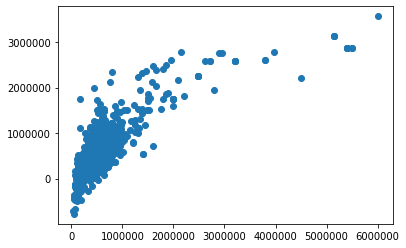

In [195]:
plt.scatter(y_valid,mode.predict(X_valid))

In [196]:
from sklearn import metrics

In [197]:
r2_score=model.score(X_valid,y_valid)

In [198]:
r2_score

0.6675114411545781

In [199]:
mode.coef_

array([  -36487.6300816 ,   924344.43106538, -2342113.73737439,
        -111396.99800032,  -430837.05762643,  -499434.19425261,
         -35067.18884315,   181188.17076689,   181188.17076689,
        4857317.91882116,  -324279.02049906])

In [200]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.630490,0.769231,0.061640,0.333333,0.5,1.0,0.0,0.491285,0.491285,0.112200,0.25
1,0.780414,0.769231,0.050837,0.333333,0.5,1.0,0.5,0.450701,0.450701,0.192593,0.25
2,0.189298,0.461538,0.059310,1.000000,0.5,1.0,1.0,0.363124,0.363124,0.123094,0.25
3,0.375063,0.615385,0.053803,0.333333,0.5,1.0,0.0,0.491285,0.491285,0.155773,0.25
4,0.651186,0.500000,0.050837,1.000000,0.5,1.0,0.0,0.341763,0.341763,0.150871,0.25


In [201]:
import pickle

In [202]:
saved_mode=pickle.dump(mode,open("i_model.sav",'wb'))

In [203]:
lmodel=pickle.load(open("model.sav",'rb'))

In [204]:
lmodel.predict(X_valid[0:5])

array([237352.75745549, 404078.34487298, 545899.60485773, 150709.17704523,
       276680.38590552])

In [54]:
#sns.pairplot(data=data,diag_kind='kde')

In [239]:
model1=LinearRegression()

In [241]:
data.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,1249,2014,145500,1,1,1,0,23.0,23.0,74.00,5.0
1,1546,2014,120000,1,1,1,2,21.1,21.1,103.52,5.0
2,375,2006,140000,3,1,1,4,17.0,17.0,78.00,5.0
3,743,2010,127000,1,1,1,0,23.0,23.0,90.00,5.0
4,1290,2007,120000,3,1,1,0,16.0,16.0,88.20,5.0


In [242]:
x_=np.array(data)

In [247]:
X_train, X_valid, y_train, y_valid = train_test_split(x_, y, test_size=0.1, random_state=1)

In [248]:
mode1=model.fit(X_train,y_train)

In [249]:
r2_score=mode.score(X_train,y_train)

In [250]:
r2_score

0.679714194600196

In [251]:
saved_mode=pickle.dump(mode,open("j_model.sav",'wb'))